# Library Data Analysis

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Library Machine Learning

In [162]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# split the data for training and testing
from sklearn.model_selection import train_test_split

# =========================== Machine Learning ==================================
#== First Algorithm
# Calssification
from sklearn.linear_model import LogisticRegression
#== Second Algorithm
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
#== Third Algorithm
# Support Vector machine
from sklearn.svm import SVC
#== Fourth Algorithm
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# ==== Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,accuracy_score

# Perform The Analysis

In [163]:
df = pd.read_csv(r'H:\Programming\AI\Course\Data Set Tiatinc\titanic dataset.csv')
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [164]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [167]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [168]:
# fix The Null value Age
# Average of Age
mean_age = df['Age'].mean()
df['Age'].fillna(value=mean_age,inplace=True)

# fix the Null Value Cabin
df.dropna(inplace=True)

In [169]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

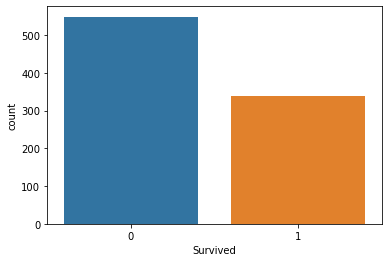

In [170]:
sns.countplot(x=df['Survived'])

In [171]:
df.duplicated().sum()

111

In [172]:
df.drop_duplicates(inplace=True)

In [173]:
df.duplicated().sum()

0

In [174]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.411311,2.249357,29.745666,0.526992,0.419023,34.712987
std,0.492388,0.853206,13.674550,0.988956,0.839346,52.280326
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.250000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Count'>

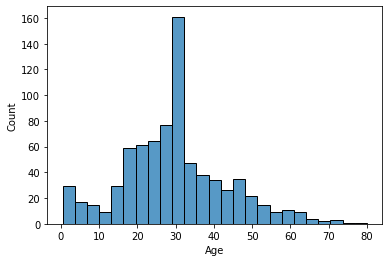

In [175]:
### check for outliers 
sns.histplot(data=df,x='Age')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

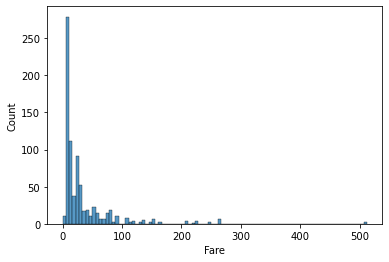

In [176]:
sns.histplot(data=df,x='Fare')

In [177]:
# Drop Age > 50
indexname = df[df['Age']>=50].index
df.drop(indexname,inplace=True)
# Drop Age > 100
indexname = df[df['Fare']>=100].index
df.drop(indexname,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

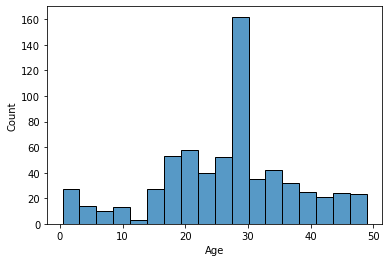

In [178]:
sns.histplot(data=df,x='Age')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

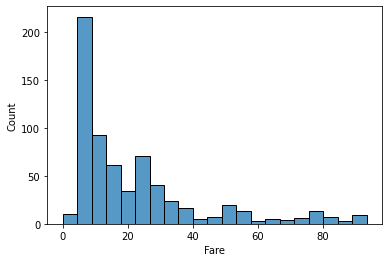

In [179]:
sns.histplot(data=df,x='Fare')

In [180]:
# use map Function
df['Sex'] = df['Sex'].map({'male':0,'female':1}).astype(int)

In [181]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [182]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [183]:
df.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.444216,1,0,0.077540,S
1,1,1,1,0.773569,1,0,0.762388,C
2,1,3,1,0.526554,0,0,0.084759,S
3,1,1,1,0.711816,1,0,0.567914,S
4,0,3,0,0.711816,0,0,0.086096,S
5,0,3,0,0.602699,0,0,0.090463,Q
7,0,3,0,0.032524,3,1,0.225401,S


In [184]:
df = pd.get_dummies(df, columns=['Embarked', 'Pclass', 'SibSp', 'Parch'])

In [185]:
df.head()

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,0.444216,0.077540,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0.773569,0.762388,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0.526554,0.084759,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0.711816,0.567914,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0.711816,0.086096,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Perform The Machine Learning Model

In [186]:
x_train = df.drop("Survived", axis=1)
y_train = df["Survived"]
x_train.shape, y_train.shape

((661, 23), (661,))

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state=42)

In [188]:
# ====================== First Algorithm =========================
# Classification OR logistic Regression
classify = LogisticRegression()
classify.fit(x_train,y_train)
y_predict = classify.predict(x_test)
acc_classify = round(classify.score(x_train,y_train)*100,2)
acc_classify

77.92

In [189]:
# ====================== Second Algorithm =========================
# Decision Tree 
model2 = DecisionTreeClassifier(max_depth=300,min_samples_split=2,min_samples_leaf=1)
model2.fit(x_train,y_train)
y_predict = model2.predict(x_test)
acc_decision = round(model2.score(x_train,y_train)*100,2)
acc_decision

98.27

In [197]:
# Grid Search
parmeters = {'kernel':['poly'],'C':[1,10,20],'degree':[5,20,40]}

scorer = make_scorer(accuracy_score)

# create model (SVM)
svc = SVC()

# create object from grid search 
grid_object = GridSearchCV(svc,parmeters,scoring=scorer)

#== fit the data
grid_fit = grid_object.fit(x_train,y_train)
best_clf = grid_fit.best_estimator_
best_clf

SVC(C=1, degree=5, kernel='poly')

In [198]:
# ====================== Third Algorithm =========================
# Support Vector Machine
svc = SVC(C=10.0,kernel='poly',degree=30) 
# c regulraization coffcient (reduce overfitting)
# kernal = shape of equation
# degree = [useful in complcity] number of curves
svc.fit(x_train,y_train)
y_predict = svc.predict(x_test)
acc_svc = round(svc.score(x_train,y_train)*100,2)
acc_svc # 80.74, 

92.64

In [199]:
# ====================== Fourth Algorithm =========================
# Random Forest
# n_estimtor = [number of tree]
random_forest = RandomForestClassifier(n_estimators=100,max_depth=300,min_samples_split=2,min_samples_leaf=1)
random_forest.fit(x_train,y_train)
y_predict = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)
acc_random_forest

98.27

In [200]:
### ============= Model Evaluation ================
# The Best Model 
machine_learning_models= pd.DataFrame({
    'Model':['Classification','Decision Tree','Support Vector Machine','Random Forest'],
    'Score':[acc_classify,acc_decision,acc_svc,acc_random_forest]
})
machine_learning_models.sort_values(by='Score',ascending=False)

,Model,Score
1,Decision Tree,98.27
3,Random Forest,98.27
2,Support Vector Machine,92.64
0,Classification,77.92


In [ ]:
# deployment 